<a href="https://colab.research.google.com/github/KImre28/ls_data/blob/main/ls_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the gathered data

## Importing packages

In [ ]:
import numpy as np
import pandas as pd
import datetime
import math
from scipy import stats
import matplotlib.dates as md
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot as plt
import seaborn as sn
from functools import reduce

import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab

## Importing dataframes
- 1 hour resolution neutron monitor data for 1/12/1981 - 10/7/2023
- 1 minute resolution neutron monitor data for 1/1/2001 - 10/7/2023
- 1 hour resolution F10.7 and DST data from OMNI data set for 1/12/1981 - 10/7/2023

In [ ]:
# 'nm' stands for 'Neutron Monitor'
# 'h' stands for 'hourly averages'
# 'm' stands for 'minutely averages'
# 'df' stands for 'dataframe'
nm_hdf = pd.read_parquet('/content/sample_data/LMKS_NM_1981-2023_hour.parquet.gzip')
nm_mdf = pd.read_parquet('/content/sample_data/LMKS_NM_2001-2023_min.parquet.gzip')
omni = pd.read_parquet('/content/sample_data/f10-dst_1981-2023_hour.parquet.gzip')

### Creating a unified dataframe for 1 hour resolution data

In [ ]:
# 'mdf' stands for 'main dataframe'
# 'h' stands for hourly averages
mdfh = pd.concat([nm_hdf, omni], axis=1)
mdfh
mdfh = mdfh.iloc[:,col].rolling(window=5).mean()

AttributeError: ignored

### A quick view of data in main dataframe

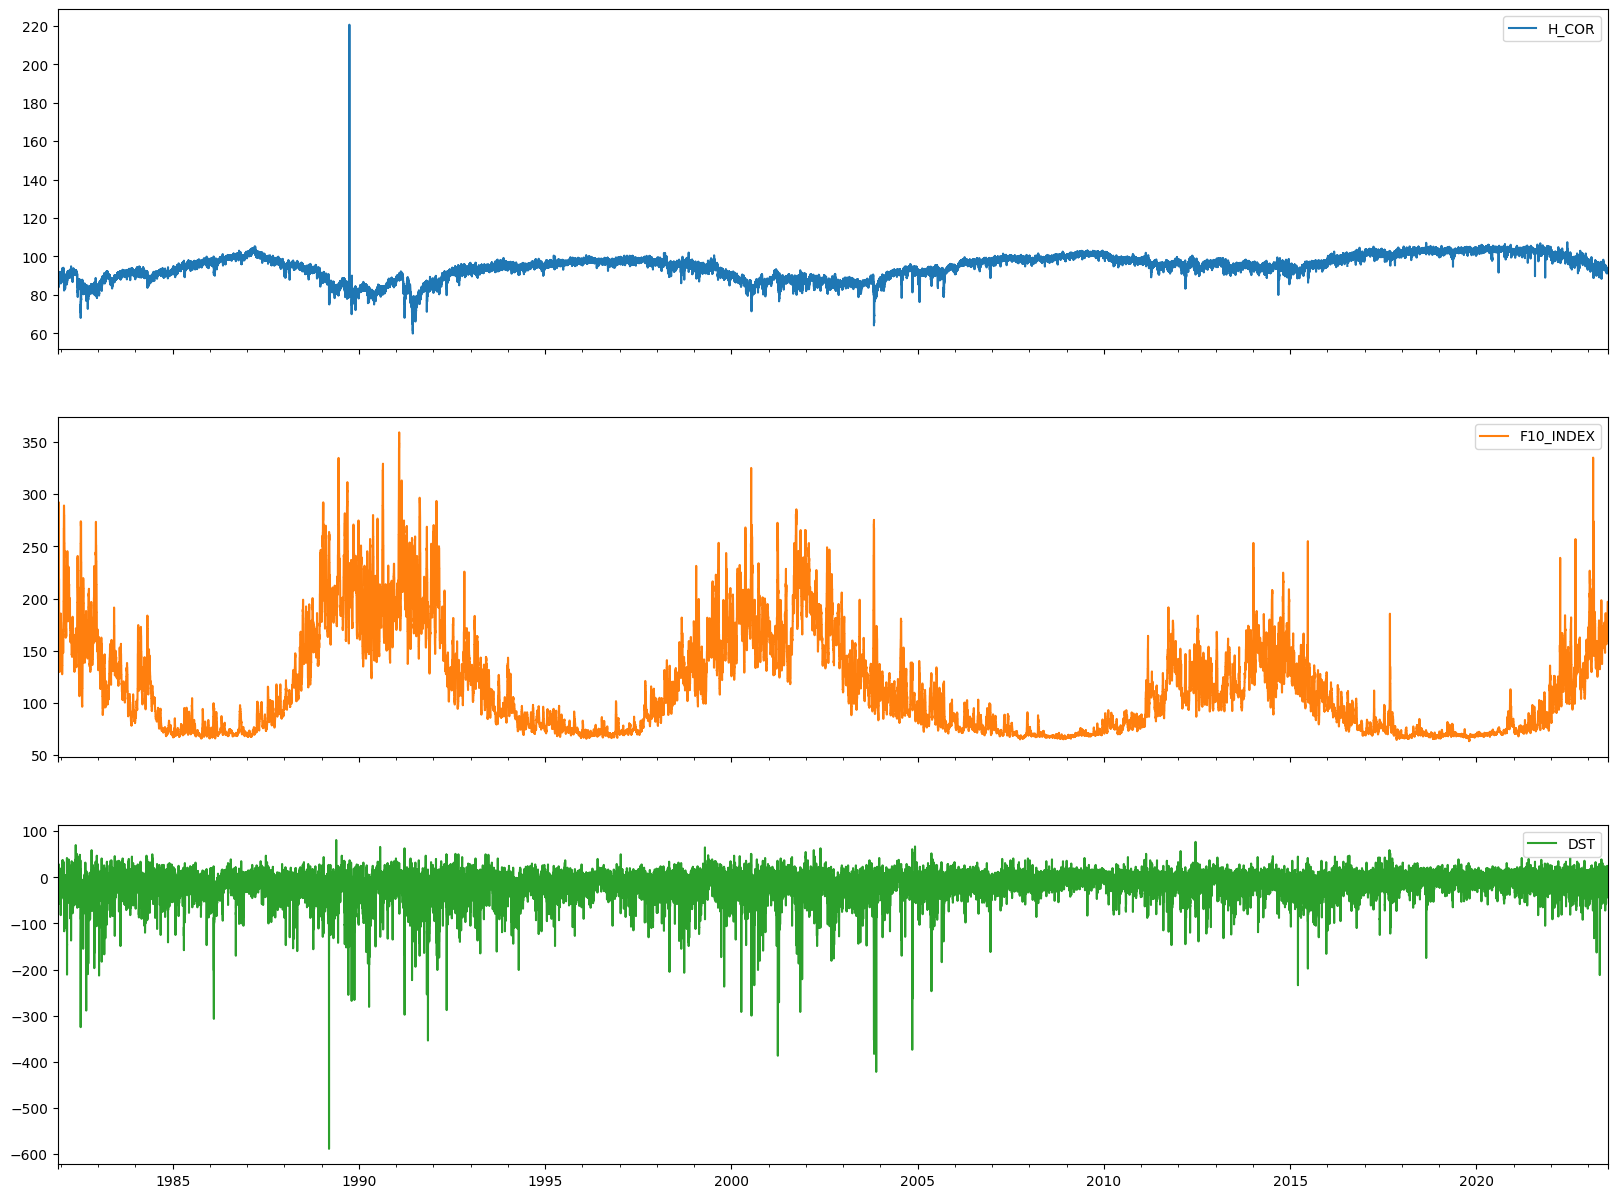

In [ ]:
mdfh.plot(subplots=True, figsize=(20,15))
#nm_mdf.plot(subplots=True, figsize=(20,5))
plt.show()

In [ ]:
# provide overall characteristics of the 1 hour resolution NM data frame
mdfh.describe()

,H_COR,F10_INDEX,DST
count,364704.000000,364416.000000,364728.00000
mean,94.506592,114.837822,-14.53995
std,6.068182,47.853996,22.10731
min,59.889000,63.400002,-589.00000
25%,90.878769,74.800003,-23.00000
50%,95.576000,99.099998,-10.00000
75%,98.739000,142.199997,-1.00000
max,220.656000,359.200012,81.00000


In [ ]:
# provide overall characteristics of the 1 minute resolution NM data frame
#nm_mdf.describe()

# Searching for correlations in data

In [1]:
mdfh.corr(method='pearson') # basic Pearson analysis (checks if the values of timeseries A change in the same direction and with the same magnitude as the values of timeseries B do)
#the results will range from -1 to 1, 1 indicating identical datasets, -1 indicating perfect anticorrelation

NameError: ignored

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_10572\2053374375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(mdfh.corr(method='pearson').iloc[0:1, 1:3])


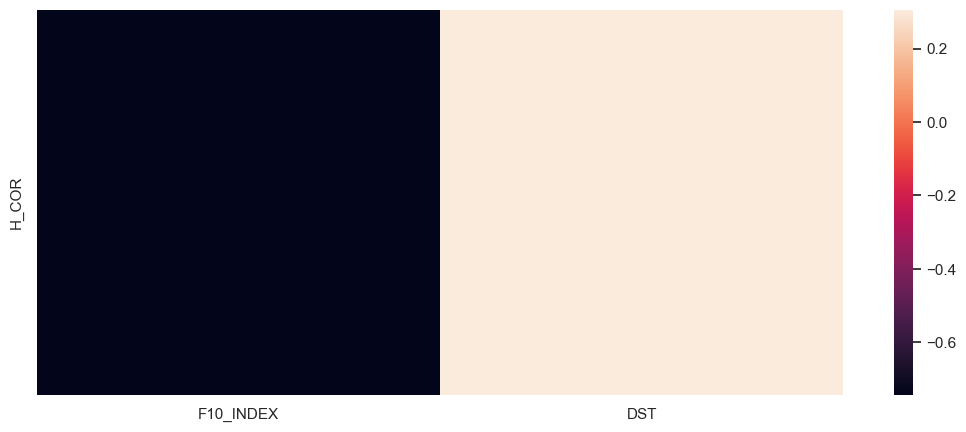

In [ ]:
sn.set(rc = {'figure.figsize':(13,5)})
sn.heatmap(mdfh.corr(method='pearson').iloc[0:1, 1:3])
plt.show()

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_10572\1642721989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(mdfh.corr(method='pearson'))


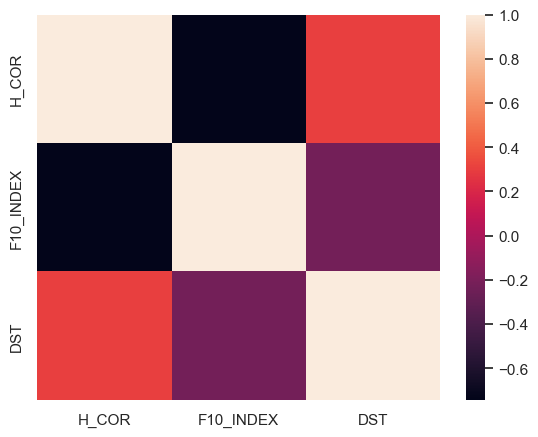

In [ ]:
sn.set(rc = {'figure.figsize':(6.5,5)})
sn.heatmap(mdfh.corr(method='pearson'))
plt.show()

In [ ]:
def polynomial_fit(df_index, df_col, deg):
  '''
  Method to provide least squares polynomial fit of specific column of DF
  :df_index - index of DF
  :df_column - specific column of DF
  : deg - degree of the fitting polynomial
  '''
  x = np.arange(0, len(df_index.values))
  y = df_col.values
  poly_model = np.polyfit(x, y, deg)
  predict = np.poly1d(poly_model)
  return predict(x)

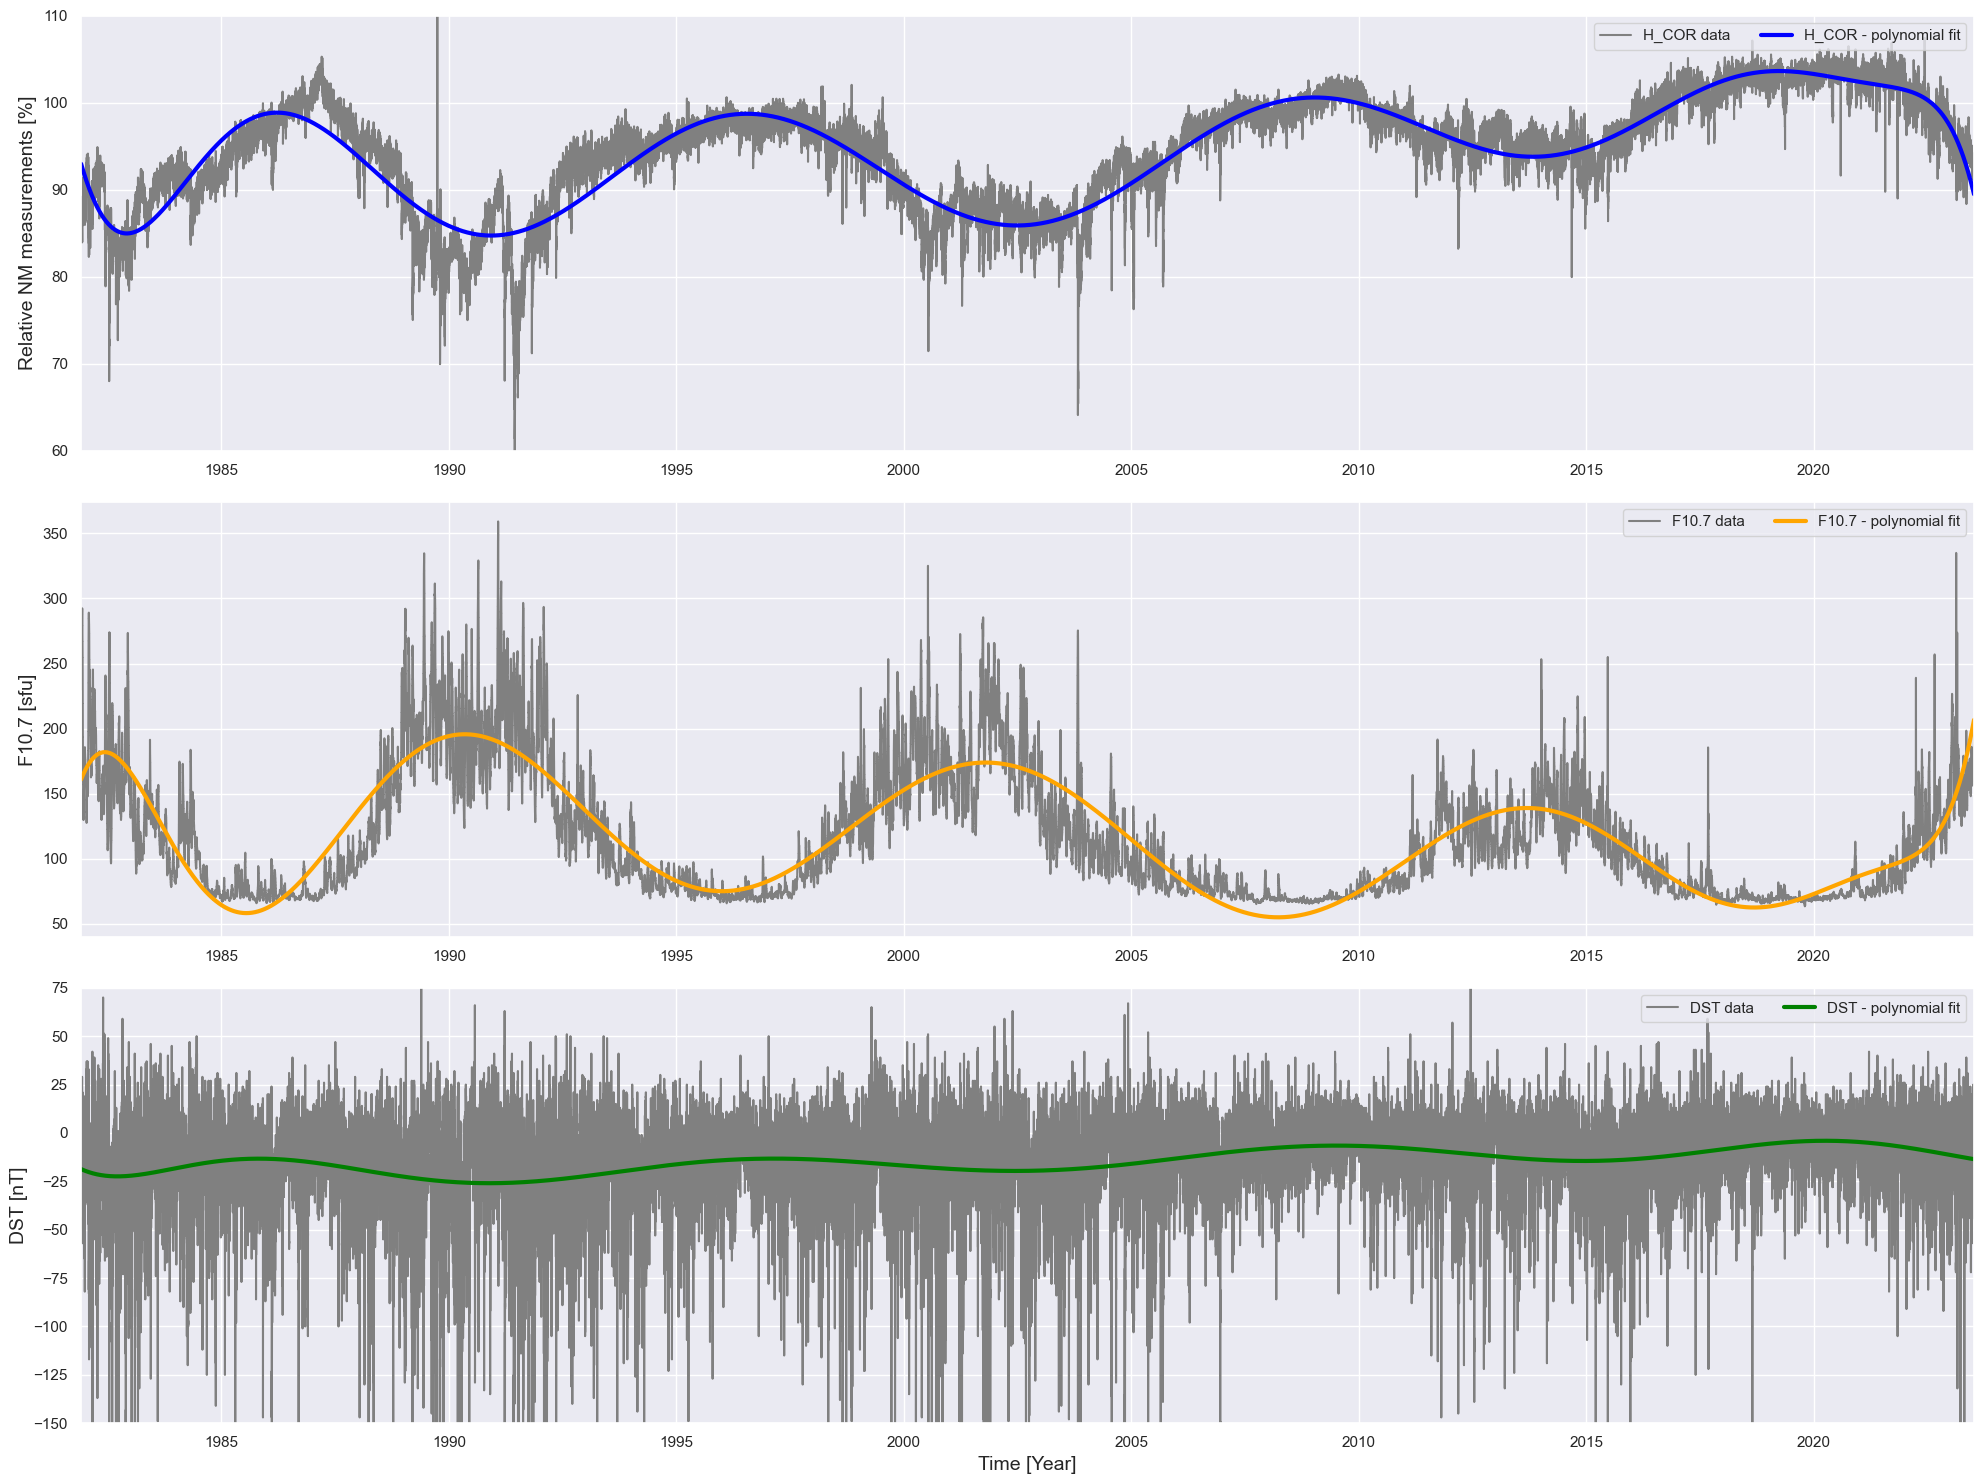

In [ ]:
mdfh['DST'].replace(0, np.NaN, inplace=True)
mdfh.interpolate(method ='linear', limit_direction ='both', inplace=True)

start_year = datetime.datetime.strptime('1981/12/01', "%Y/%m/%d")
end_year = datetime.datetime.strptime('2023/07/10 23:00:00', "%Y/%m/%d %H:%M:%S")

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.ylabel('Relative NM measurements [%]', fontsize=14)
plt.xlim(start_year, end_year)
plt.ylim(60, 110)
ax=plt.gca()
plt.plot(mdfh.index, mdfh.H_COR, color='gray', label='H_COR data')
plt.plot(mdfh.index, polynomial_fit(mdfh.index, mdfh.H_COR, 12),
         color='blue', label='H_COR - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.subplot(312)
plt.ylabel('F10.7 [sfu]', fontsize=14)
plt.xlim(start_year, end_year)
ax=plt.gca()
plt.plot(mdfh.index, mdfh.F10_INDEX, color='gray', label='F10.7 data')
plt.plot(mdfh.index, polynomial_fit(mdfh.index, mdfh.F10_INDEX, 12),
         color='orange', label='F10.7 - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.subplot(313)
plt.ylabel('DST [nT]', fontsize=14)
plt.xlim(start_year, end_year)
plt.ylim(-150, 75)
ax=plt.gca()
plt.plot(mdfh.index, mdfh.DST, color='gray', label='DST data')
plt.plot(mdfh.index, polynomial_fit(mdfh.index, mdfh.DST, 12),
         color='green', label='DST - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.xlabel('Time [Year]', fontsize=14)
plt.tight_layout()
plt.show()

# Correlation of certain periods only

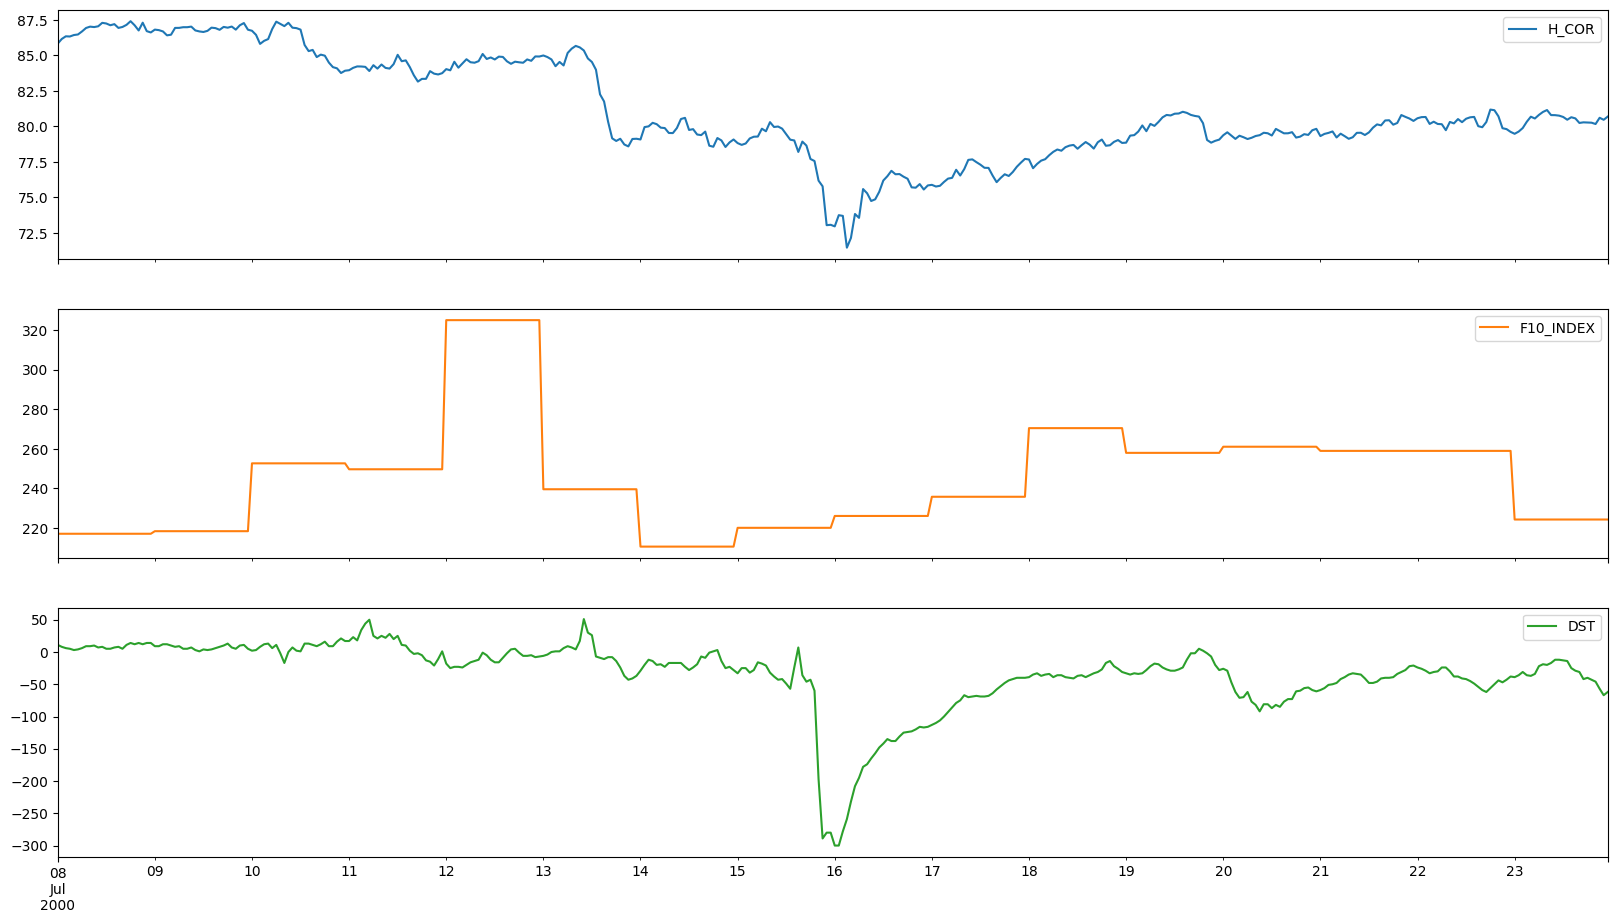

In [ ]:
mdfh.loc["2000-07-08": "2000-07-23"].plot(subplots=True, figsize=(20,11)) # just an example of a Forbush decrease
plt.show()

In [ ]:
events = [["1991-03-22", "1991-03-26"], ["1991-10-26", "1991-10-30"], ["1998-11-04", "1998-11-08"], ["2000-07-12", "2000-07-16"], ["2003-10-26", "2003-10-30"], ["2012-03-05", "2012-03-09"]] # all selected timeintervals should come here. They will be combined into a new dataframe
edf = pd.DataFrame()

for event in events:
    edf = pd.concat([edf, mdfh[event[0] : event[1]]])

edf

,H_COR,w,F10_INDEX,DST
1991-03-22 00:00:00,82.514000,,257.700012,-37
1991-03-22 01:00:00,82.070000,,257.700012,-39
1991-03-22 02:00:00,82.152000,,257.700012,-37
1991-03-22 03:00:00,82.472000,,257.700012,-38
1991-03-22 04:00:00,82.697000,,257.700012,-33
...,...,...,...,...
2012-03-09 19:00:00,83.954469,,143.500000,-98
2012-03-09 20:00:00,83.975798,,143.500000,-99
2012-03-09 21:00:00,83.379764,,143.500000,-95
2012-03-09 22:00:00,83.656463,,143.500000,-90


In [ ]:
edf.corr(method='pearson')
# fds ["1991-03-21", "1991-03-27"], ["1991-10-25", "1991-10-31"], ["1998-11-05", "1998-11-11"], ["2000-07-13", "2000-07-19"], ["2003-10-26", "2003-11-01"] collection of timeintervals with FDs
# [["1991-03-22", "1991-03-26"], ["1991-10-26", "1991-10-30"], ["1998-11-04", "1998-11-08"], ["2000-07-12", "2000-07-16"], ["2003-10-26", "2003-10-30"]] best correlation results from 4 day periods around FDs
# gles [["1989-09-29", "1989-09-30"], ["2005-05-20", "2005-05-21"], ["2022-06-09", "2022-06-10"]] collection of timeintervals with GLEs
# [["1989-09-26", "1989-10-3"], ["2005-05-17", "2005-05-24"], ["2022-06-06", "2022-06-13"]] 1 week intervals surrounding GLEs (this is not the best correlating timespan)
# tges [["2017-06-10", "2017-06-11"], ["2022-06-09", "2022-06-10"]] collection of timeintervals with TGEs
# [["2017-06-07", "2017-06-14"], ["2022-06-06", "2022-06-13"]] 1 week intervals surrounding TGEs (this is not the best correlating timespan)

<ipython-input-10-1ef45e85816a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  edf.corr(method='pearson')


,H_COR,F10_INDEX,DST
H_COR,1.000000,-0.743891,0.555186
F10_INDEX,-0.743891,1.000000,-0.243048
DST,0.555186,-0.243048,1.000000


In [ ]:
# sn.set(rc = {'figure.figsize':(13,5)})
# sn.heatmap(edf.corr(method='pearson').iloc[0:1, 1:3])
# plt.show()

# Correlation of shifted data

In [ ]:
print(mdfh.head())
smdfh = mdfh.copy()
smdfh.DST = smdfh.DST.shift(21) # shift the Dst data backwards
print(smdfh.head())

                      H_COR w   F10_INDEX  DST
1981-12-01 00:00:00  87.268    230.699997    4
1981-12-01 01:00:00  86.924    230.699997    5
1981-12-01 02:00:00  86.867    230.699997    6
1981-12-01 03:00:00  86.408    230.699997    7
1981-12-01 04:00:00  86.523    230.699997    8
                      H_COR w   F10_INDEX  DST
1981-12-01 00:00:00  87.268    230.699997  NaN
1981-12-01 01:00:00  86.924    230.699997  NaN
1981-12-01 02:00:00  86.867    230.699997  NaN
1981-12-01 03:00:00  86.408    230.699997  NaN
1981-12-01 04:00:00  86.523    230.699997  NaN


In [ ]:
smdfh.corr(method='pearson') # correlate the shifted Dst data

<ipython-input-83-c97a74f03d64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  smdfh.corr(method='pearson')


,H_COR,F10_INDEX,DST
H_COR,1.00000,-0.742120,0.314300
F10_INDEX,-0.74212,1.000000,-0.221916
DST,0.31430,-0.221916,1.000000


<ipython-input-27-929ae357476d>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = smdfh.corr(method='pearson')
<ipython-input-27-929ae357476d>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = smdfh.corr(method='pearson')
<ipython-input-27-929ae357476d>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = smdfh.corr(method='pearson')
<ipython-input-27-929ae357476d>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future v

0    21
dtype: int64


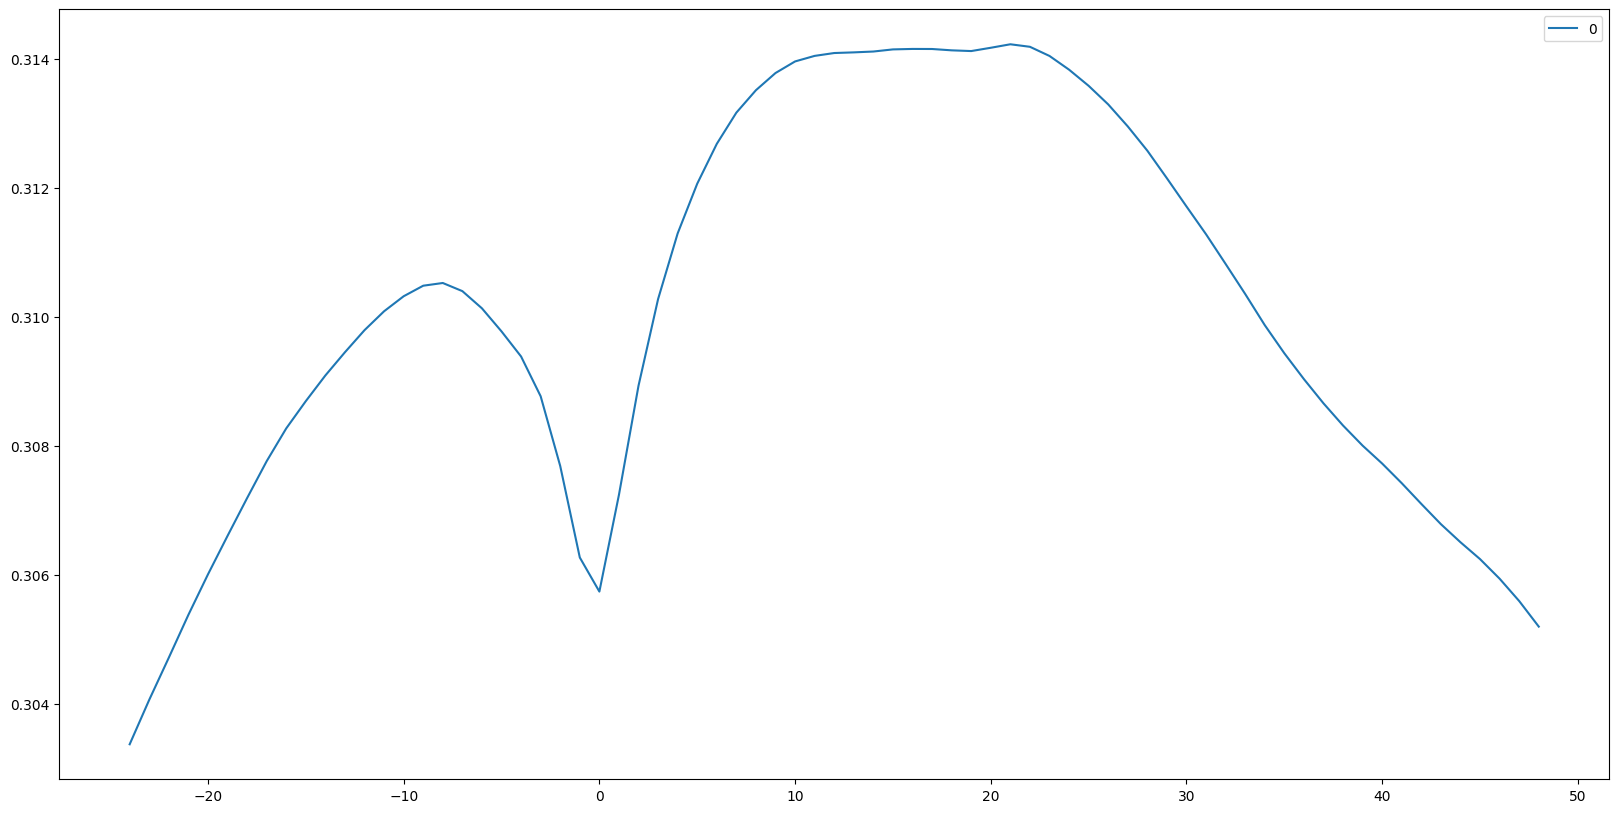

In [ ]:
# test the effect of the timeshift on the correlations for different amounts
shifts = range(-24, 49)
values = pd.DataFrame()

for shift in shifts:
    smdfh = mdfh.copy()
    smdfh.DST = smdfh.DST.shift(shift)
    smdfh.interpolate(method ='linear', limit_direction ='both', inplace=True)
    corr = smdfh.corr(method='pearson')
    values = pd.concat([values, pd.DataFrame([corr[0:1].DST[0]],[shift])])

print(values.idxmax())

values.plot(subplots=True, figsize=(20,10))
plt.show()